In [5]:
import requests
apikey='BHI17LSTJRKDDJS0'

In [28]:
url = r'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IBM&apikey={apikey}'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


C:\Users\sarda\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


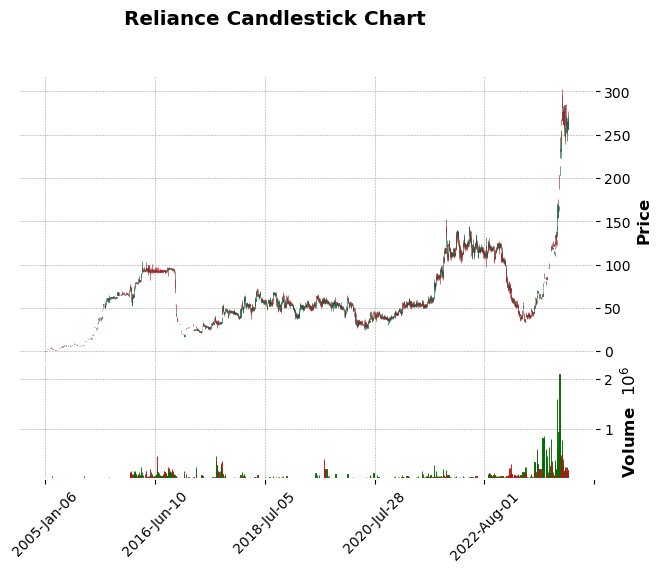

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Assuming you have your API key stored in a variable named apikey

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ORIRAIL.BSE&outputsize=full&apikey={apikey}'
r = requests.get(url)
data = r.json()

# Extracting the time series data
time_series_data = data['Time Series (Daily)']

# Converting data to a DataFrame
df = pd.DataFrame(time_series_data).T
df.index = pd.to_datetime(df.index)

# Sorting the DataFrame by date
df.sort_index(inplace=True)

# Converting columns to numeric
df = df.apply(pd.to_numeric)

# Renaming columns for mplfinance
df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)

# Plotting candlestick chart
mpf.plot(df, type='candle', style='charles', title='Reliance Candlestick Chart', ylabel='Price', volume=True)
plt.show()


In [17]:
pip install mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   -------------------------------------- - 71.7/75.0 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 588.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\sarda\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


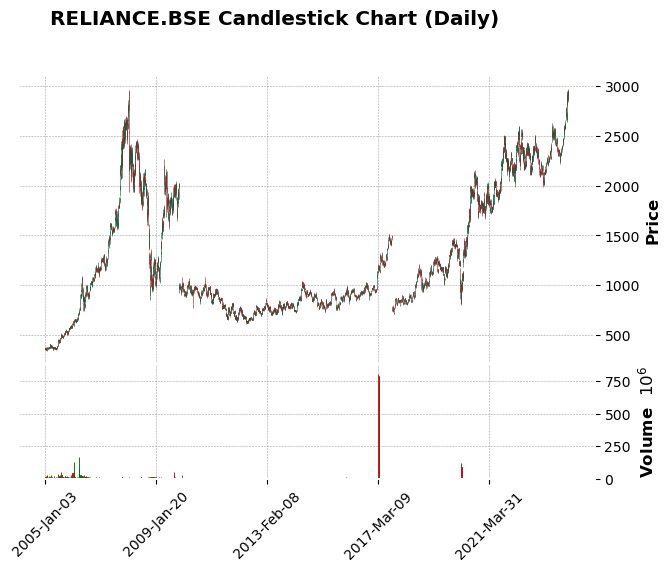

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import tkinter as tk
from tkinter import messagebox

# Function to fetch data based on user selection
def fetch_data(timeframe):
    symbol = symbol_entry.get()
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_{timeframe}&symbol={symbol}.BSE&outputsize=full&apikey={apikey}'
    
    try:
        r = requests.get(url)
        data = r.json()
        
        # Extracting the time series data
        time_series_data = data[f'Time Series ({timeframe.capitalize()})']
        
        # Converting data to a DataFrame
        df = pd.DataFrame(time_series_data).T
        df.index = pd.to_datetime(df.index)
        
        # Sorting the DataFrame by date
        df.sort_index(inplace=True)
        
        # Converting columns to numeric
        df = df.apply(pd.to_numeric)
        
        # Renaming columns for mplfinance
        df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)
        
        # Plotting candlestick chart
        mpf.plot(df, type='candle', style='charles', title=f'{symbol} Candlestick Chart ({timeframe.capitalize()})', ylabel='Price', volume=True)
        plt.show()
        
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Create a tkinter window
root = tk.Tk()
root.title("Stock Data Visualization")

# Label and Entry for stock symbol
symbol_label = tk.Label(root, text="Enter Stock Symbol:")
symbol_label.grid(row=0, column=0, padx=5, pady=5)
symbol_entry = tk.Entry(root)
symbol_entry.grid(row=0, column=1, padx=5, pady=5)

# Function to handle button clicks
def button_click(timeframe):
    fetch_data(timeframe)

# Buttons for selecting time frame
daily_button = tk.Button(root, text="DAILY", command=lambda: button_click("DAILY"))
daily_button.grid(row=1, column=0, padx=5, pady=5)

weekly_button = tk.Button(root, text="WEEKLY", command=lambda: button_click("WEEKLY"))
weekly_button.grid(row=1, column=1, padx=5, pady=5)

monthly_button = tk.Button(root, text="MONTHLY", command=lambda: button_click("MONTHLY"))
monthly_button.grid(row=1, column=2, padx=5, pady=5)

root.mainloop()